<a href="https://colab.research.google.com/github/leomaranhao/COVID-19/blob/master/COVID_por_dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import pandas.io.formats.format as pf
import datetime

## **CASOS COVID-19 NO MUNDO**

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [0]:
for i in range(0, df.shape[0]):
    for j in range(4, df.shape[1]):
        if (df.iloc[i, j] != 0):
            dif = j-4
            for g in range(j, df.shape[1]):
                df.iloc[i, g-dif] = df.iloc[i, g]
            
            for g in range(dif, 0 , -1):
                df.iloc[i, df.shape[1] - g] = np.NaN
                
            break


In [0]:
new_columns = df.columns.values
for h in range(4, df.shape[1]):    
    new_columns[h] = str(h-4+1)
df.columns = new_columns 
df = df.groupby(['Country/Region']).sum()
df = df.iloc[:, 2:df.shape[1]]
df = df.loc[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'France', 'South Africa']]
df = df.T

In [0]:
for j in range(0, df.shape[1]):
    for i in range(0, df.shape[0]):
        if (df.iloc[i, j] == 0):
            df.iloc[i, j] = np.NaN


### **Gráfico - Evolução do número de casos da COVID-19 a partir da primeira notificação.**

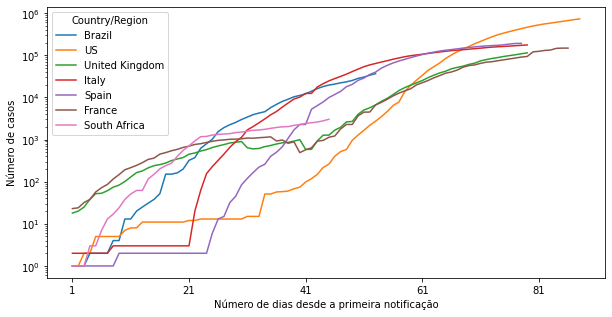

In [28]:
ax = df.plot(logy=True, figsize=(10,5))
ax.set_xlabel("Número de dias desde a primeira notificação")
ax.set_ylabel("Número de casos")
ax

### **Dados do Dia**

In [29]:
tabela = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
tabela = tabela.groupby(['Country/Region']).sum()
tabela['País'] = tabela.index
tabela = tabela.iloc[:, [tabela.shape[1]-1, tabela.shape[1]-2]]
tabela = tabela.loc[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'France', 'South Africa']]
titulo = tabela.columns[1]
tabela.columns = ['País','Número de Casos']
#tabela.index = pd.DatetimeIndex(df.index)
tabela.index.names = ['']
#with custom_formatting():
#  print(tabela)
styles = [
    dict(selector="table", props=[("border", "1px solid black"),
                                  ("border-collapse", "collapse"),
                                  ("border-spacing", "0px")]),
    dict(selector="tr", props=[("border", "1px solid black")]),
    dict(selector="td", props=[("border", "1px solid black")])
]
html = (tabela.style #.set_table_styles(styles)
          .format({'Número de Casos':'{0:,.0f}'})
          .bar(subset=['Número de Casos',], color='#FFA07A')
          .hide_index().set_caption(f'Casos COVID-19 - {datetime.datetime.strptime(titulo, "%m/%d/%y").strftime("%d/%m/%Y")}'))
html


País,Número de Casos
Brazil,"36,658"
US,"732,197"
United Kingdom,"115,314"
Italy,"175,925"
Spain,"191,726"
France,"149,149"
South Africa,"3,034"


## **MORTES POR COVID-19 NO MUNDO**

In [0]:
dfm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [0]:
for i in range(0, dfm.shape[0]):
    for j in range(4, dfm.shape[1]):
        if (dfm.iloc[i, j] != 0):
            dif = j-4
            for g in range(j, dfm.shape[1]):
                dfm.iloc[i, g-dif] = dfm.iloc[i, g]
            
            for g in range(dif, 0 , -1):
                dfm.iloc[i, dfm.shape[1] - g] = np.NaN
                
            break

new_columns = dfm.columns.values
for h in range(4, dfm.shape[1]):    
    new_columns[h] = str(h-4+1)
dfm.columns = new_columns 
dfm = dfm.groupby(['Country/Region']).sum()
dfm = dfm.iloc[:, 2:dfm.shape[1]]
dfm = dfm.loc[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'France', 'South Africa']]
dfm = dfm.T

for j in range(0, dfm.shape[1]):
    for i in range(0, dfm.shape[0]):
        if (dfm.iloc[i, j] == 0):
            dfm.iloc[i, j] = np.NaN
            

### **Gráfico - Evolução do número de mortes da COVID-19 a partir da primeira notificação.**

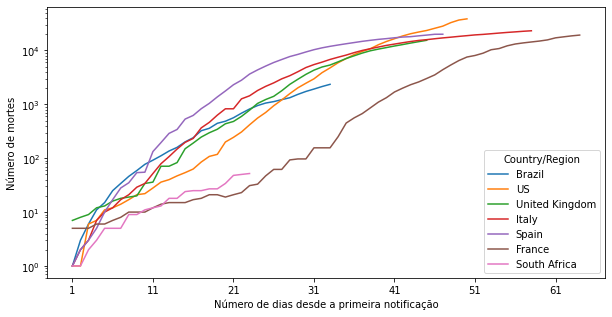

In [32]:
ax = dfm.plot(logy=True, figsize=(10,5))
ax.set_xlabel("Número de dias desde a primeira morte")
ax.set_ylabel("Número de mortes")
ax

### **Dados do Dia**

In [33]:
tabela = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
tabela = tabela.groupby(['Country/Region']).sum()
tabela['País'] = tabela.index
tabela = tabela.iloc[:, [tabela.shape[1]-1, tabela.shape[1]-2]]
tabela = tabela.loc[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'France', 'South Africa']]
titulo = tabela.columns[1]
tabela.columns = ['País','Número de Mortes']
tabela.index.names = ['']
styles = [
    dict(selector="table", props=[("border", "1px solid black"),
                                  ("border-collapse", "collapse"),
                                  ("border-spacing", "0px")]),
    dict(selector="tr", props=[("border", "1px solid black")]),
    dict(selector="td", props=[("border", "1px solid black")])
]
html = (tabela.style #.set_table_styles(styles)
          .format({'Número de Mortes':'{0:,.0f}'})
          .bar(subset=['Número de Mortes',], color='#FFA07A')
          .hide_index().set_caption(f'Mortes COVID-19 - {datetime.datetime.strptime(titulo, "%m/%d/%y").strftime("%d/%m/%Y")}'))
html

País,Número de Mortes
Brazil,"2,354"
US,"38,664"
United Kingdom,"15,498"
Italy,"23,227"
Spain,"20,043"
France,"19,345"
South Africa,52


## **MORTALIDADE COVID-19 NO MUNDO**

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

new_columns = df.columns.values
for h in range(4, df.shape[1]):    
    new_columns[h] = str(h-4+1)
df.columns = new_columns 
df = df.groupby(['Country/Region']).sum()
df = df.iloc[:, 2:df.shape[1]]

new_columns = dfm.columns.values
for h in range(4, dfm.shape[1]):    
    new_columns[h] = str(h-4+1)
dfm.columns = new_columns 
dfm = dfm.groupby(['Country/Region']).sum()
dfm = dfm.iloc[:, 2:dfm.shape[1]]

mortalidade = dfm

for i in range(0, dfm.shape[0]):
    for j in range(0, dfm.shape[1]):
        if (df.iloc[i, j] != 0):
            mortalidade.iloc[i, j] = dfm.iloc[i, j] / df.iloc[i, j] * 100
        else:
            mortalidade.iloc[i, j] = 0
            
for i in range(0, mortalidade.shape[0]):
    for j in range(0, mortalidade.shape[1]):
        if (mortalidade.iloc[i, j] != 0):
            dif = j
            for g in range(j, mortalidade.shape[1]):
                mortalidade.iloc[i, g-dif] = mortalidade.iloc[i, g]
            
            for g in range(dif, 0 , -1):
                mortalidade.iloc[i, mortalidade.shape[1] - g] = np.NaN
                
            break

mortalidade = mortalidade.loc[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'France', 'South Africa']]
mortalidade = mortalidade.T


### **Gráfico - Evolução da mortalidade da COVID-19 a partir da primeira notificação.**

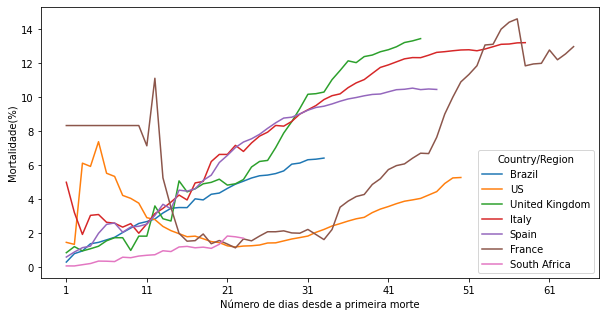

In [52]:
ax = mortalidade.plot(figsize=(10,5))
ax.set_xlabel("Número de dias desde a primeira morte")
ax.set_ylabel("Mortalidade(%)")
ax

### **Dados do Dia**

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

df = df.groupby(['Country/Region']).sum()
df = df.iloc[:, 2:df.shape[1]]

dfm = dfm.groupby(['Country/Region']).sum()
dfm = dfm.iloc[:, 2:dfm.shape[1]]

mortalidade = dfm

for i in range(0, dfm.shape[0]):
    for j in range(0, dfm.shape[1]):
        if (df.iloc[i, j] != 0):
            mortalidade.iloc[i, j] = dfm.iloc[i, j] / df.iloc[i, j] * 100
        else:
            mortalidade.iloc[i, j] = 0

mortalidade = mortalidade.loc[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'France', 'South Africa']]

tabela = mortalidade

tabela['País'] = tabela.index
tabela = tabela.iloc[:, [tabela.shape[1]-1, tabela.shape[1]-2]]
tabela = tabela.loc[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'France', 'South Africa']]
#titulo = tabela.columns[1] - já vem de cima
tabela.columns = ['País','Mortalidade (%)']
tabela.index.names = ['']
styles = [
    dict(selector="table", props=[("border", "1px solid black"),
                                  ("border-collapse", "collapse"),
                                  ("border-spacing", "0px")]),
    dict(selector="tr", props=[("border", "1px solid black")]),
    dict(selector="td", props=[("border", "1px solid black")])
]
html = (tabela.style #.set_table_styles(styles)
          .format({'Mortalidade (%)':'{0:,.2f}'})
          .bar(subset=['Mortalidade (%)',], color='#FFA07A')
          .hide_index().set_caption(f'Mortalidade COVID-19 - {datetime.datetime.strptime(titulo, "%m/%d/%y").strftime("%d/%m/%Y")}'))
html

País,Mortalidade (%)
Brazil,6.42
US,5.28
United Kingdom,13.44
Italy,13.20
Spain,10.45
France,12.97
South Africa,1.71
